In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../DataSets/modified_synthetic_economic_data.csv')

In [3]:
df.head()

,year,month,interest_rate,unemployment_rate,index_price
0,1924,1,3.50,5.19,534.714897
1,1925,1,2.86,4.36,424.911412
2,1926,1,3.65,5.18,582.253910
3,1927,1,4.52,5.81,784.797318
4,1928,1,2.77,5.07,321.169866


In [4]:
# lets drop unnecessary columns ==> like year and month since we do not need them for predicting the target variable that is index_prize
df.drop(columns=['year', 'month'], inplace=True)

In [5]:
df.sample(10)

,interest_rate,unemployment_rate,index_price
19,1.59,8.22,-380.574528
630,1.31,6.06,-237.006791
403,3.05,3.80,543.461726
1093,3.05,3.79,544.602116
1104,4.11,7.99,425.125153
875,4.79,4.53,1005.106307
819,4.07,3.14,930.047388
162,4.16,5.18,740.390152
857,3.47,6.31,405.970264
536,2.14,3.42,301.932691


In [6]:
# check null values
df.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

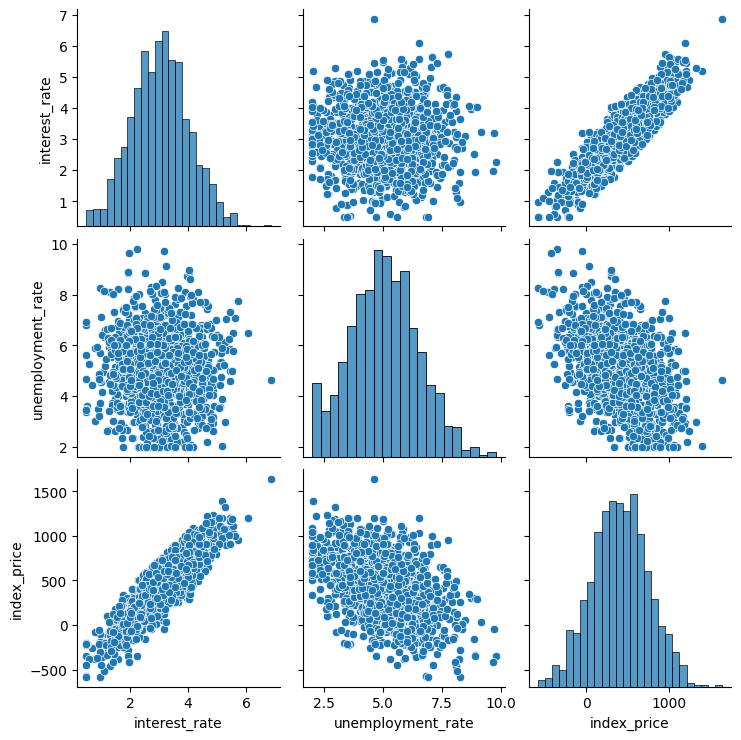

In [7]:
# Visualize the relationships between features and the target variable
sns.pairplot(df)
plt.show()

In [8]:
df.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,0.014553,0.890899
unemployment_rate,0.014553,1.000000,-0.441184
index_price,0.890899,-0.441184,1.000000


## Interpretation of Correlation Matrix for Feature Selection

- In Correlation Matrix above:
    - we see correlation coefficients between each pair of features
    - values range from -1 to 1
        - indicate strength and direction of linear relationships
        - 1: perfect positive correlation
        - -1: perfect negative correlation
        - 0: no linear correlation
            - \> 0.7 or < -0.7: strong correlation
            - 0.3 to 0.7 or -0.3 to -0.7: moderate correlation
            - < 0.3 or > -0.3: weak correlation
- Here we observe:
    - interest_rate vs index_price: 0.89 (strong positive correlation)
    - unemployment_rate vs index_price: -0.44 (moderate negative correlation)
    - interest_rate vs unemployment_rate: 0.014 (negligible correlation)

- and select features based on their correlation with the target variable (index_price) and multicollinearity among features.

For predicting index_price, interest_rate is the strongest predictor with a high positive correlation (0.89), while unemployment_rate shows a moderate negative relationship (-0.44). Since the input features are nearly uncorrelated 
with each other, the dataset is well-suited for linear regression without multicollinearity issues.

- Should you drop any column?

    - ❌ NO

        interest_rate → must keep

        unemployment_rate → improves model stability & realism

    - Only drop features if:

        Correlation with target ≈ 0

        OR severe multicollinearity (not here) : meaning the features are highly correlated with each other => interest_rate vs unemployment_rate → 0.014

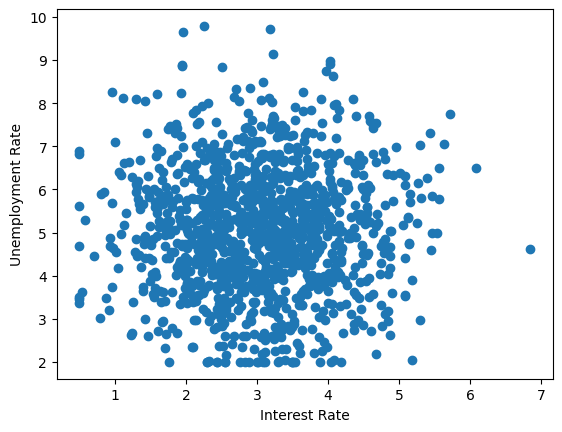

In [9]:
# Visualize the relationships between features and the target variable
plt.scatter(df['interest_rate'] , df['unemployment_rate'])
plt.xlabel('Interest Rate')
plt.ylabel('Unemployment Rate')
plt.show()

<Axes: xlabel='interest_rate', ylabel='unemployment_rate'>

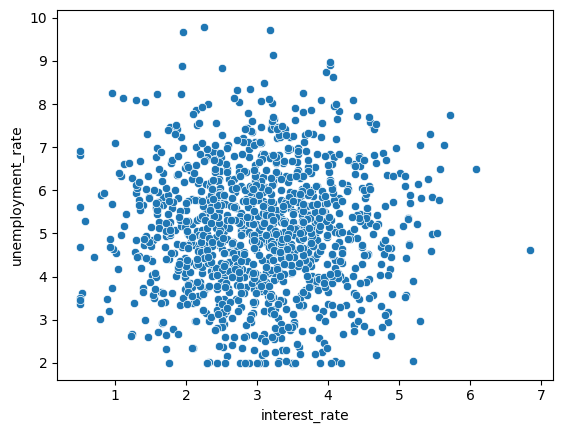

In [10]:
# Alternative using seaborn
sns.scatterplot(x=df['interest_rate'] , y= df['unemployment_rate'])

### Lets Get the dependent and independent features ready for model training


In [11]:
x = df[['interest_rate' , 'unemployment_rate' ]]
y = df['index_price']

In [12]:
print(x.head())
print(y.head())

   interest_rate  unemployment_rate
0           3.50               5.19
1           2.86               4.36
2           3.65               5.18
3           4.52               5.81
4           2.77               5.07
0    534.714897
1    424.911412
2    582.253910
3    784.797318
4    321.169866
Name: index_price, dtype: float64


In [13]:
# alternative way (Recommended)
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [14]:
print(x.head())
print(y.head())

   interest_rate  unemployment_rate
0           3.50               5.19
1           2.86               4.36
2           3.65               5.18
3           4.52               5.81
4           2.77               5.07
0    534.714897
1    424.911412
2    582.253910
3    784.797318
4    321.169866
Name: index_price, dtype: float64


In [15]:
print(type(x))  # already a Pandas DataFrame
print(type(y))  # Pandas Series but no need to convert it to DataFrame since sklearn can handle both DataFrame and Series

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


### Train Test Split

In [16]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size=0.2 , random_state=42)

**sns.regplot**

It is a type of plot in the seaborn library that combines a scatter plot with a regression line. It is used to visualize the relationship between two continuous variables and to see how well a linear regression model fits the data.

<Axes: xlabel='interest_rate', ylabel='index_price'>

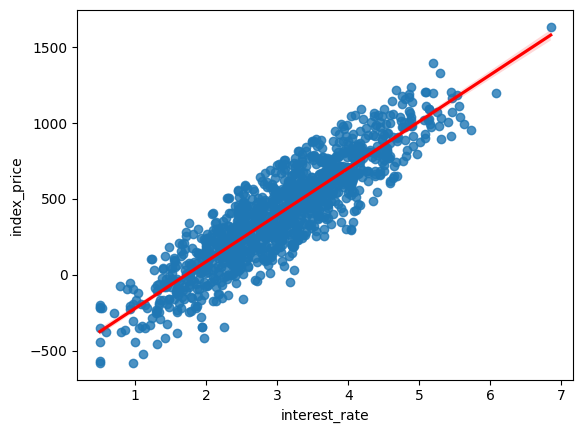

In [17]:
sns.regplot(x='interest_rate' , y='index_price', line_kws={"color":"r"}, data=df)

<Axes: xlabel='unemployment_rate', ylabel='index_price'>

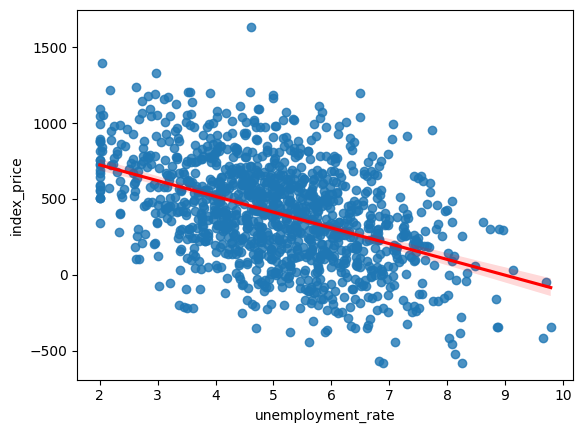

In [18]:
sns.regplot(x='unemployment_rate' , y='index_price' , line_kws={"color":"r"}, data=df)

<Axes: xlabel='interest_rate', ylabel='unemployment_rate'>

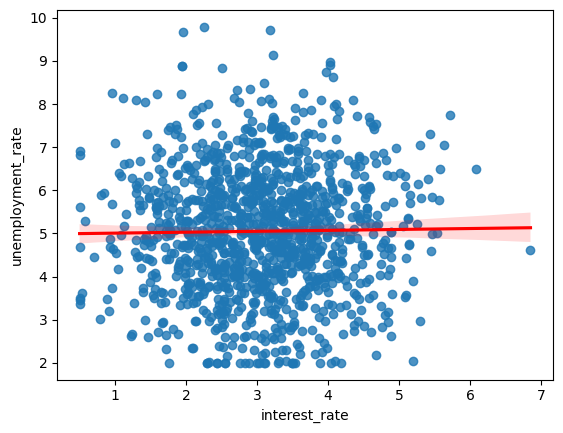

In [19]:
sns.regplot(x='interest_rate' , y='unemployment_rate' , line_kws={"color":"r"}, data=df)

### Standardization of Features using Z-score Normalization

In [20]:
from sklearn.preprocessing import StandardScaler    # To Standardize the features like changing them to have mean 0 and variance 1 using Z-score normalization

In [21]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

## Lets Train the Model

In [43]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train , y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


### **Cross Validation**

It is a technique used to assess the performance and generalization ability of a machine learning model. It involves partitioning the dataset into multiple subsets (folds), training the model on some folds, and validating it on the remaining fold. This process is repeated several times, with each fold serving as the validation set once. The results are then averaged to provide a more robust estimate of the model's performance.

- It helps in:
    - Reducing overfitting
    - Providing a more reliable estimate of model performance
    - Making better use of limited data

Code to import and perform cross validation function:

`from sklearn.model_selection import cross_val_score`

`cv_scores = cross_val_score(name_of_model, x , y , cv=number_of_folds, scoring='neg_mean_squared_error')`

here,
- `name_of_model` is the machine learning model you want to evaluate.
- `x` is the feature set (independent variables).
- `y` is the target variable (dependent variable).
- `cv` specifies the number of folds for cross-validation. *example :*      
    - *cv=5 and data-set will be split into 5 parts where 4 parts will be used for training and 1 part for       testing in each iteration.*
    - *Then the process is repeated 5 times, with each part serving as the test set once.*
    - *Finally, the results from each iteration are averaged to provide an overall performance metric.*
- `scoring` parameter defines the metric used to evaluate the model's performance.
- `r2` is used as the scoring metric, which represents the coefficient of determination. It indicates how well the independent variables explain the variance in the dependent variable. An R² value of 1 means perfect prediction, while 0 means no predictive power.
- `neg_mean_squared_error` is used as the scoring metric, which is common for regression tasks. The negative sign is used because scikit-learn's cross_val_score function expects a score where higher values are better, and mean squared error is a loss function where lower values are better.

In [44]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, x_train, y_train, cv=5,scoring='neg_mean_squared_error')
print("Cross-validation scores:", scores)

Cross-validation scores: [-0.41330914 -0.82398412 -0.14060423 -0.95471478 -0.85406066]


The above scores represent the negative mean squared error for each fold in the cross-validation process.

*[0.9999959  0.99999406 0.99999861 0.99999126 0.99999227]* = R² scores for each of the 5 folds in the cross-validation.

since these values are very close to 1, it indicates that the model is performing exceptionally well on the training data across all folds.

In [28]:
# mean of cross-validation scores
print("Mean cross-validation score:", np.mean(scores))

Mean cross-validation score: -0.637334584102146


### Predicting on Test Data

In [45]:
y_pred = model.predict(x_test)
y_pred

array([ 159.35563434,  372.07141322,  110.74119347,  552.3394048 ,
        615.58321799,  673.72390689, 1201.81629762,  394.0506317 ,
        302.73418157,  354.71123862,  229.24715979,   44.81836469,
        103.24732049,  211.19597127,   49.42628858,  151.91344142,
        478.54198276,  169.17014927,  708.17452252,  807.59463278,
        107.61135084,  722.0168275 ,  145.64634281,  350.47280839,
        302.54938143,  146.77706377,  975.73117417,  398.79898236,
        260.06902571,   91.72555082,  292.98246671,  945.42293535,
        134.65673357,  554.5047933 ,  686.34685082,  367.62604948,
        408.95344424,  336.54546335,  493.18247507,  507.52368712,
       -138.31714929,  453.84678865,  122.42181663,   31.30859334,
        353.43267755,  208.56863574,  430.18255542, -106.37928244,
        469.38893505,  878.04415869,  629.14837607,  605.86104982,
        320.94422356,  301.76602076,  444.40547405,  373.61600119,
        400.21426355,  405.44669462,  716.27076933,  268.99300

### Performance Evaluation

In [31]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score 

In [32]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
adj_r2 = 1 - (1 - r2) * (len(y_test) - 1) / (len(y_test) - x_test.shape[1] - 1)

In [33]:
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)
print("Adjusted R-squared:", adj_r2)

Mean Squared Error (MSE): 0.34478127689671595
Mean Absolute Error (MAE): 0.22302280653244394
Root Mean Squared Error (RMSE): 0.5871807872339795
R-squared (R2): 0.9999972923940825
Adjusted R-squared: 0.9999972695450875


## Assumptions 


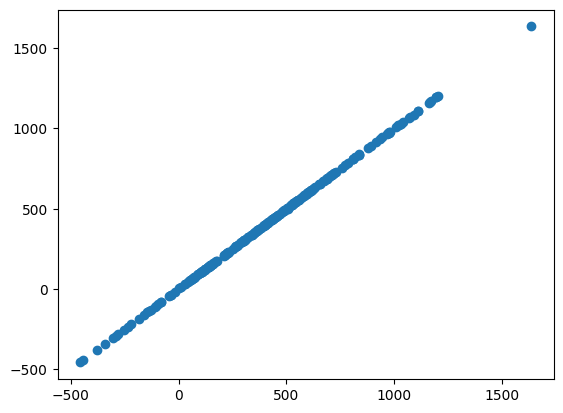

In [34]:
plt.scatter(y_test , y_pred)

In [35]:
residuals = y_test - y_pred
print(residuals)

1178   -0.106894
865    -0.120842
101     0.131930
439    -0.219553
58     -0.220465
          ...   
382    -0.215813
867    -0.054661
542    -0.044872
1193   -0.241496
874    -0.244343
Name: index_price, Length: 240, dtype: float64


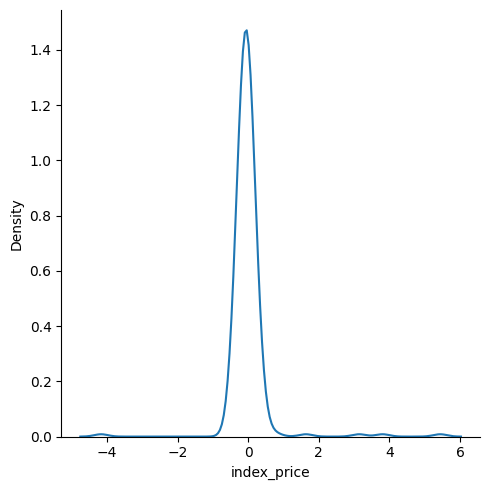

In [37]:
# plot residuals
sns.displot(residuals, kind="kde")

If the residuals are randomly distributed around zero, it suggests that the model is appropriate for the data. However, if there are patterns in the residuals (e.g., funnel shape, curvature), it indicates that the model may not be capturing all the underlying trends in the data, and a different modeling approach may be needed.

so basically we are checking whether the residuals are normally distributed or not.

- if yes → good model
- if no → bad model

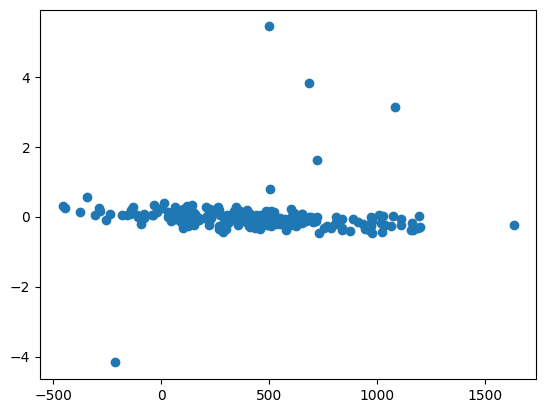

In [38]:
# Scatter plot of residuals vs predicted values
plt.scatter(y_pred, residuals)

The residuals are mostly randomly scattered around zero, indicating that the linearity assumption is satisfied and the linear regression model is generally appropriate. However, the presence of a few outliers and a slightly increased spread at higher predicted values suggests mild heteroscedasticity(it means the variance of residuals is not constant), which may slightly affect model robustness but does not severely violate assumptions.

## Trying With OLS technique

it is by default used in statsmodels library for linear regression.

In [39]:
import statsmodels.api as sm

In [42]:
model_Ols = sm.OLS(y_train, sm.add_constant(x_train)).fit()
model_Ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            index_price   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 8.485e+07
Date:                Sat, 17 Jan 2026   Prob (F-statistic):               0.00
Time:                        23:20:09   Log-Likelihood:                -1143.3
No. Observations:                 960   AIC:                             2293.
Df Residuals:                     957   BIC:                             2307.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        406.3897      0.026   1.58e+04      0.000     406.339     406.440
x1           298.1670      0.026   1.16e+04      0.000     298.117     298.218
x2          -154.6805      0.026  -6010.502      0.000    -154.731    -154.630
==============================================================================
Omnibus:                     1276.003   Durbin-Watson:                   2.056
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           306494.692
Skew:                           6.937   Prob(JB):                         0.00
Kurtosis:                      89.428   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [46]:
print(model.coef_)
print(model.intercept_)

[ 298.16702069 -154.68054612]
406.38967307980585
